# Churn Modeling Exercise

Read only the following subset of the columns from ``data/Churn_Modelling.csv`` file

```python
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 
 'NumOfProducts',  'IsActiveMember', 'EstimatedSalary', 'Exited']
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols_to_use = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 
 'NumOfProducts',  'IsActiveMember', 'EstimatedSalary', 'Exited']

churn = pd.read_csv('data/Churn_Modelling.csv', usecols=cols_to_use)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


Now your dataset contains some features about the customers of a bank and their bank account. 

The `Exited` column indicates whether a customer churned (i.e. left the bank)

## Create a plot for number of customers in each country

There is also a way to plot directly from pandas Series using [`pandas.Series.plot`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) function.


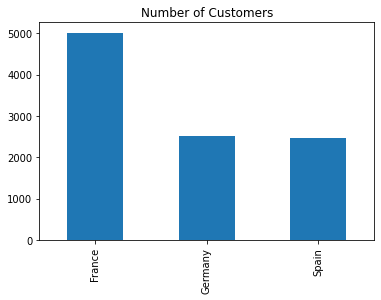

In [2]:
churn['Geography'].value_counts().plot(kind='bar', title="Number of Customers");

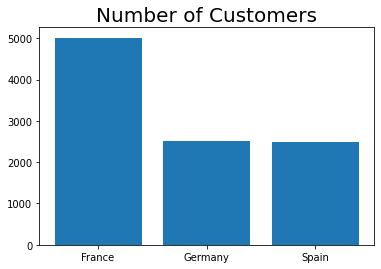

In [3]:
plt.figure()
plt.title("Number of Customers", fontsize=20)

plt.bar(x=churn['Geography'].value_counts().index,
        height=churn.Geography.value_counts().values);

### Customize ticks
* for x axis I want ticks to be rotated by 45 degrees and written with fontsize 18
* for y axis I want ticks to differ by 500 and continue till 7000 included.

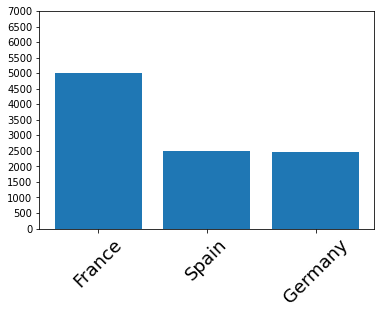

In [175]:
fig, ax = plt.subplots()

ax.bar(churn['Geography'].unique(), churn['Geography'].value_counts())

plt.xticks(rotation=45, fontsize=18)
ax.set_ylim(0,7000)
plt.yticks(range(0,7001,500));


### Make your figure 1.5 times bigger

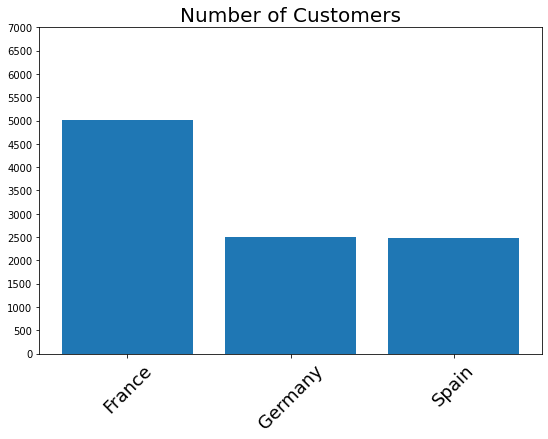

In [5]:
plt.figure(figsize=[9, 6])
plt.title("Number of Customers", fontsize=20)

plt.bar(x=churn['Geography'].value_counts().index,
        height=churn.Geography.value_counts().values)


plt.xticks(fontsize=18, rotation=45)
plt.yticks(ticks=np.arange(0, 7001, 500));

## Visualize the distribution of the `balance` column

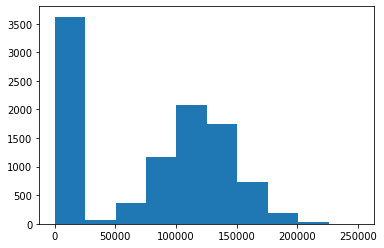

In [177]:
plt.hist(churn['Balance']);

## Visualize only distribution of values between 50000 and 150000 with 15 bins
change the bar color and edge color to different colors from [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)  list

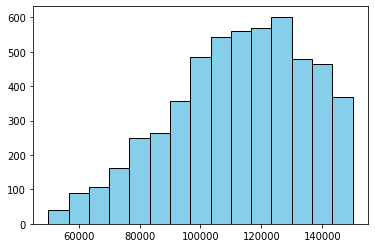

In [178]:
plt.hist(churn['Balance'], range=(50000, 150000), bins=15, color='skyblue', ec='k');

## Check if there is a correlation between `'CreditScore'` and `'Age'` columns.

coef: -0.003964905525390069


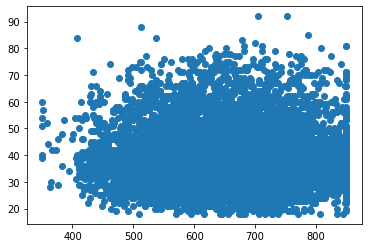

In [6]:
cor = churn['CreditScore'].corr( churn['Age'])
print(f'coef: {cor}')

plt.scatter(churn['CreditScore'], churn['Age']);

only few samples are enough to see the picture.

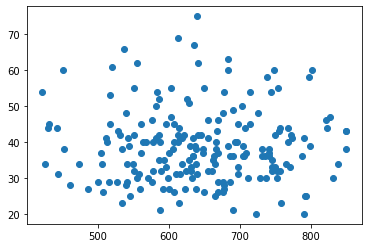

In [9]:
sample = churn.sample(n=200)  
plt.scatter(x=sample['CreditScore'], y=sample['Age']);

## Compare `'CreditScore'` and `'Age'` columns from Germany and France on 500 random sample of data.
Locate labels box in the lower left corner with 10 fontsize.

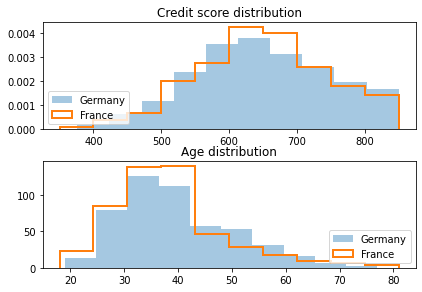

In [10]:
fig, ax = plt.subplots(2)

fig.tight_layout()  # to add space between subplots

ger_csc = churn[churn['Geography'] == 'Germany']['CreditScore'].sample(n=500)
fr_csc = churn[churn['Geography'] == 'France']['CreditScore'].sample(n=500)

ger_age = churn[churn['Geography'] == 'Germany']['Age'].sample(n=500)
fr_age = churn[churn['Geography'] == 'France']['Age'].sample(n=500)

ax[0].hist(ger_csc, alpha=0.4, label='Germany', density=True)  # density=True for normaliszation
ax[0].hist(fr_csc , histtype='step', lw=2, label='France', density=True)


ax[1].hist(ger_age, alpha=0.4, label='Germany')
ax[1].hist(fr_age, histtype='step', lw=2, label='France')

ax[0].set_title('Credit score distribution')
ax[1].set_title('Age distribution')
ax[0].legend(loc='lower left', fontsize=10)
ax[1].legend(loc='lower right', fontsize=10);

## Plot side by side number of customers in each country and number of products 
* Y ticks should be the same for both plots
* Figure size should be (8, 5)
* Subplots should have titles corresponding to their meaning


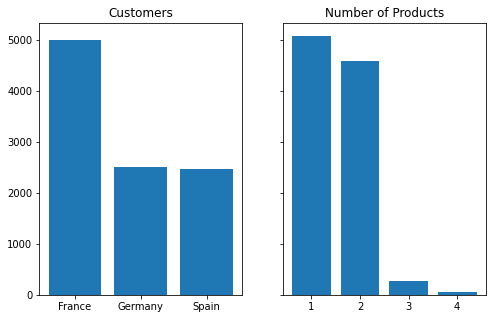

In [11]:
countries = churn.Geography.value_counts()
products = churn.NumOfProducts.value_counts()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,5))  # sharey=True to have same y axis ticks

ax1.bar(x=countries.index, height=countries.values)
ax1.set_title("Customers", fontsize=12)

ax2.bar(x=products.index, height=products.values)
ax2.set_title("Number of Products", fontsize=12);

## Visualize the distributions of a pair of `'CreditScore'` and `'Age'` columns.
Add colorbar to your plot as well.

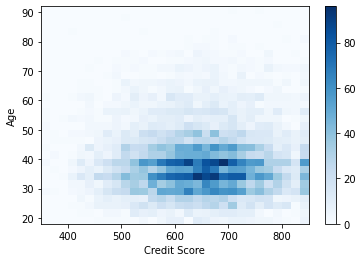

In [207]:

plt.hist2d(churn['CreditScore'], churn['Age'], bins=30, cmap='Blues')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.colorbar();


## Compare `'Estimated Salary'` and `'Balance'` columns from Exited and Stayed users on 500 random sample of data.


In [13]:
exited = churn[churn['Exited'] == 1]
stayed = churn[~(churn['Exited'] == 1)]

# exited['EstimatedSalary'].sample(n=500)
# exited['Balance'].sample(n=500)

# stayed['EstimatedSalary'].sample(n=500)
# stayed['Balance'].sample(n=500)

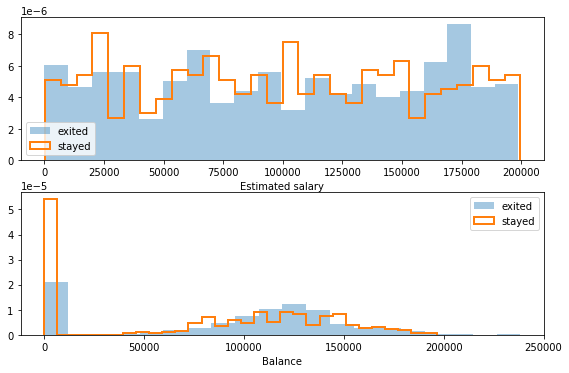

In [14]:
fig, ax = plt.subplots(2, figsize=(8,5))

fig.tight_layout()

exited_kwargs = dict(bins=20, alpha=0.4, density=True, label='exited')
stayed_kwargs = dict(bins=30, histtype='step', lw=2,  density=True, label='stayed')

ax[0].hist(exited['EstimatedSalary'].sample(n=500), **exited_kwargs)
ax[0].hist(stayed['EstimatedSalary'].sample(n=500), **stayed_kwargs)

ax[1].hist(exited['Balance'].sample(n=500), **exited_kwargs)
ax[1].hist(stayed['Balance'].sample(n=500), **stayed_kwargs)

ax[0].set_xlabel('Estimated salary')
ax[1].set_xlabel('Balance')
ax[0].legend(loc='lower left')
ax[1].legend();


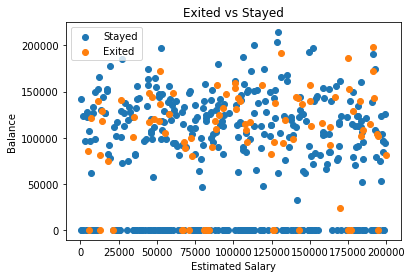

In [15]:
sample = churn.sample(n=500)

fig, ax = plt.subplots()

ax.set(title='Exited vs Stayed',
       xlabel='Estimated Salary', ylabel='Balance')


ax.scatter(x=sample[sample.Exited == 0]['EstimatedSalary'], 
           y=sample[sample.Exited == 0]['Balance'], label='Stayed')


ax.scatter(x=sample[sample.Exited == 1]['EstimatedSalary'], 
           y=sample[sample.Exited == 1]['Balance'], label='Exited')


ax.legend();